<a href="https://colab.research.google.com/github/sunha-park/mining/blob/main/%EC%9C%A0%EB%B0%A9%EC%95%94%EB%B6%84%EB%A5%98%EC%98%88%EC%B8%A1_G%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기와 데이터셋 나누기: 전처리 데이터 적용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/breast-cancer-wisconsin.csv', encoding='utf-8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
data.isnull().sum()

code                           0
Clump_Thickness                0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
data['Class'].unique()

array([0, 1])

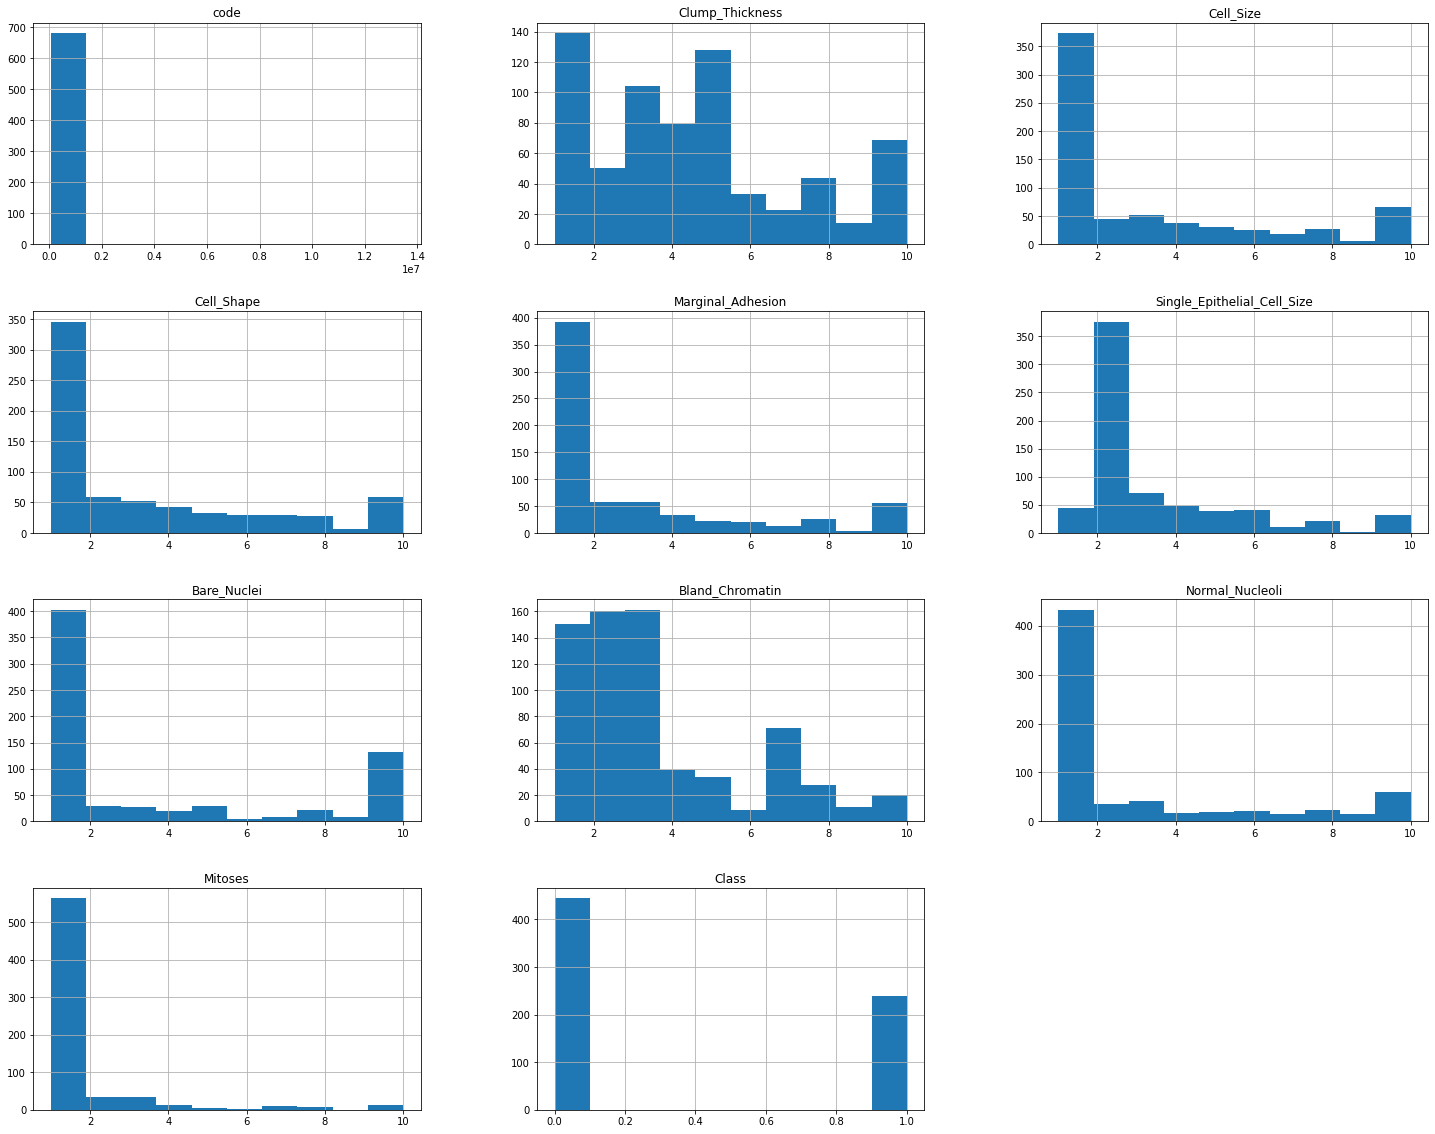

In [ ]:
data.hist(figsize=(25,20));

In [ ]:
X=data.iloc[:,1:10]
y=data['Class']

min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
#연속형데이터 X2에 대해 min-max 스케일링에서 사용할 최소값과 최대값을 구하자.
scaler1.fit(X)
X_scaled1=scaler1.transform(X)
pd.DataFrame(X_scaled1).describe()

,0,1,2,3,4,5,6,7,8
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.382463,0.238978,0.246136,0.203351,0.248251,0.282740,0.271677,0.207744,0.067025
std,0.313418,0.340572,0.332065,0.318285,0.247009,0.404873,0.272189,0.339185,0.192519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.333333,0.333333,0.555556,0.444444,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


standard

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
scaler2.fit(X)
X_scaled2=scaler2.transform(X)

In [ ]:
pd.DataFrame(X_scaled2).describe() #정규분포로 정규화

,0,1,2,3,4,5,6,7,8
count,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.144359e-16,0.000000,-6.241957e-17,4.681468e-17,-2.080652e-17,0.000000,3.120978e-17,2.080652e-17,3.120978e-17
std,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00
min,-1.221191e+00,-0.702212,-7.417736e-01,-6.393655e-01,-1.005763e+00,-0.698853,-9.988531e-01,-6.129274e-01,-3.483997e-01
25%,-8.664174e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-5.903401e-01,-6.129274e-01,-3.483997e-01
50%,-1.568693e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-1.818272e-01,-6.129274e-01,-3.483997e-01
75%,5.526787e-01,0.603740,5.976352e-01,4.086824e-01,3.447014e-01,0.674325,6.351988e-01,3.705403e-01,-3.483997e-01
max,1.971775e+00,2.236180,2.271896e+00,2.504778e+00,3.045631e+00,1.772867,2.677764e+00,2.337476e+00,4.849690e+00


In [ ]:
#X_scaled.columns=['Clump_Thickness','Cell_Size','Cell_Shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled2, y, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(512, 9) (171, 9) (512,) (171,)


#의사결정나무

###Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth': range(2,20,1),'min_samples_leaf': range(1,50,1)}

grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 50)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 17, 'min_samples_leaf': 1}
Best Cross-validity Score: 0.969
Test set Score: 0.953


In [ ]:
result_grid=pd.DataFrame(grid_search.cv_results_)

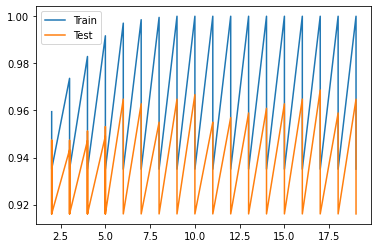

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

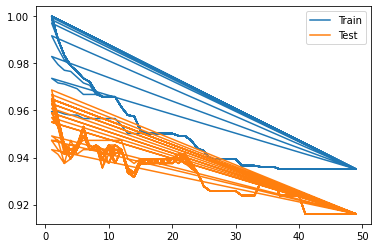

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

###Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [ ]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4b389c1040>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4b38c5f2b0>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 17, 'min_samples_leaf': 6}
Best Cross-validity Score: 0.953
Test set Score: 0.953


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001184,0.000272,0.000415,0.000071,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.961165,0.902913,0.960784,...,0.943404,0.021538,3,0.970660,0.977995,0.975610,0.980488,0.978049,0.976560,0.003329
1,0.000863,0.000073,0.000345,0.000042,15,31,"{'max_depth': 15, 'min_samples_leaf': 31}",0.941748,0.902913,0.941176,...,0.923834,0.015557,8,0.938875,0.941320,0.931707,0.931707,0.939024,0.936527,0.004030
2,0.000904,0.000025,0.000336,0.000011,17,6,"{'max_depth': 17, 'min_samples_leaf': 6}",0.961165,0.941748,0.970588,...,0.953132,0.014359,1,0.968215,0.973105,0.970732,0.980488,0.975610,0.973630,0.004218
3,0.000829,0.000102,0.000328,0.000009,15,44,"{'max_depth': 15, 'min_samples_leaf': 44}",0.912621,0.902913,0.941176,...,0.916048,0.028029,9,0.933985,0.941320,0.931707,0.929268,0.939024,0.935061,0.004491
4,0.000878,0.000009,0.000328,0.000010,12,7,"{'max_depth': 12, 'min_samples_leaf': 7}",0.961165,0.922330,0.941176,...,0.943366,0.015565,4,0.968215,0.970660,0.965854,0.980488,0.975610,0.972165,0.005269
5,0.000923,0.000017,0.000320,0.000006,5,2,"{'max_depth': 5, 'min_samples_leaf': 2}",0.970874,0.951456,0.960784,...,0.949172,0.015778,2,0.992665,0.980440,0.990244,0.980488,0.987805,0.986328,0.005029
6,0.000806,0.000012,0.000324,0.000006,11,29,"{'max_depth': 11, 'min_samples_leaf': 29}",0.941748,0.902913,0.941176,...,0.925795,0.014494,6,0.938875,0.941320,0.931707,0.931707,0.953659,0.939454,0.008070
7,0.000784,0.000023,0.000319,0.000013,16,39,"{'max_depth': 16, 'min_samples_leaf': 39}",0.912621,0.902913,0.941176,...,0.923891,0.018691,7,0.933985,0.941320,0.931707,0.929268,0.939024,0.935061,0.004491
8,0.000794,0.000019,0.000340,0.000021,8,45,"{'max_depth': 8, 'min_samples_leaf': 45}",0.912621,0.902913,0.941176,...,0.916048,0.028029,9,0.933985,0.941320,0.931707,0.929268,0.939024,0.935061,0.004491
9,0.000820,0.000009,0.000321,0.000009,19,20,"{'max_depth': 19, 'min_samples_leaf': 20}",0.951456,0.932039,0.950980,...,0.939444,0.011443,5,0.955990,0.948655,0.946341,0.946341,0.953659,0.950197,0.003941


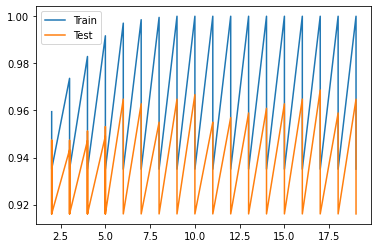

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

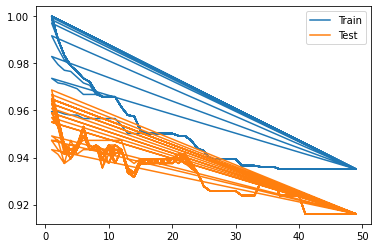

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

###변수 중요도

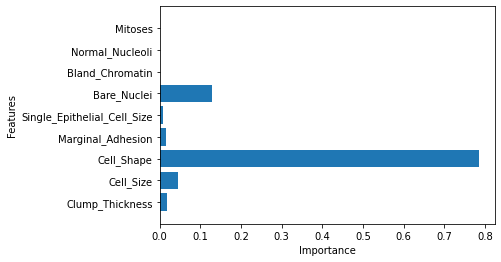

In [ ]:
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

In [ ]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.01894562 0.04483192 0.78428789 0.01508025 0.00804986 0.12880447
 0.         0.         0.        ]


변수중요도 : cell_shape - Bare_Nuclei - cell_size

시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
tree=DecisionTreeClassifier(max_depth=17, min_samples_leaf=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6)

In [ ]:
!pip install graphviz
# graphvis 설치가 제대로 되지 않을 경우 아래에서 직접 설치
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['0', '1'],
                feature_names=X.columns, impurity=False, filled=True)

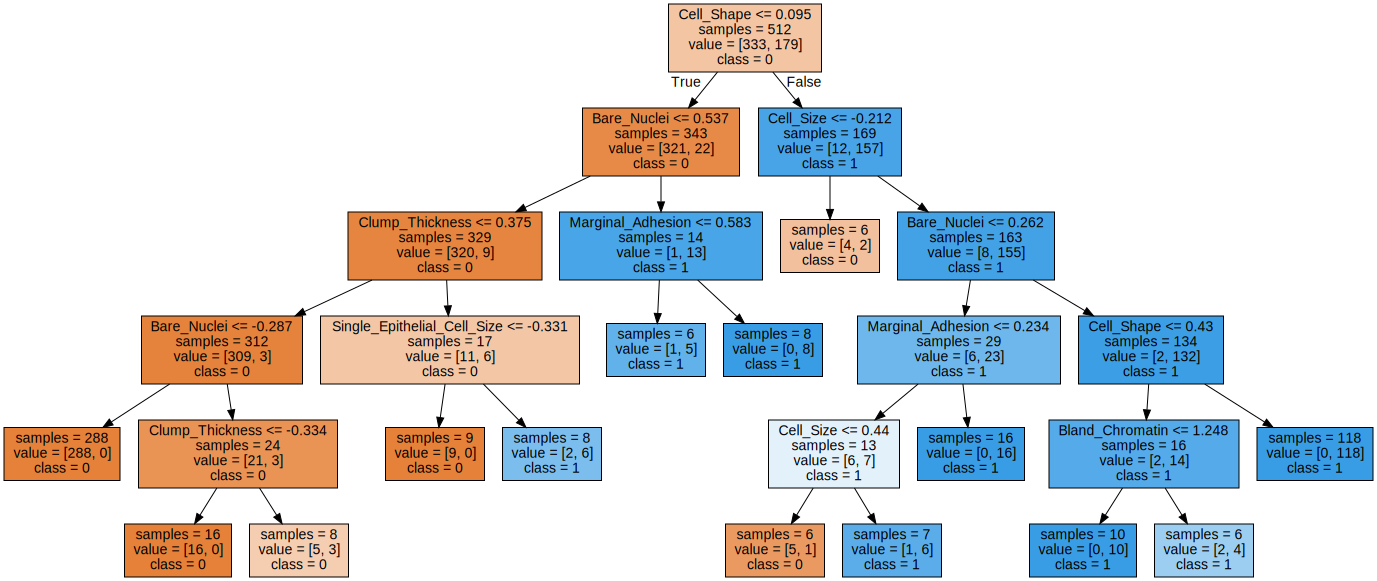

In [ ]:
with open("tree.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
f1=f1_score(y_test, pred_test)
print("f1_score =", f1,"\n")
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1_score = 0.943089430894309 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



##모델평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)
print('Train 정확도:',accuracy_score(y_train, pred_train))
print('Test 정확도:',accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.9649122807017544


In [ ]:
max_depth_list = range(1,20)
train_list=[]
test_list=[]
for max_depth in max_depth_list:
  tree = DecisionTreeClassifier(max_depth = max_depth)
  tree.fit(X_train, y_train)
  pre_train = tree.predict(X_train)
  pred_test = tree.predict(X_test)
  train_list.append(accuracy_score(y_train, pred_train))
  test_list.append(accuracy_score(y_test, pred_test))

d = {
    "max_depth":max_depth_list,
     "Train 정확도":train_list,
     "Test 정확도":test_list
}
acc_df = pd.DataFrame(d)
acc_df

,max_depth,Train 정확도,Test 정확도
0,1,1.0,0.900585
1,2,1.0,0.941520
2,3,1.0,0.947368
3,4,1.0,0.953216
4,5,1.0,0.947368
5,6,1.0,0.953216
6,7,1.0,0.959064
7,8,1.0,0.953216
8,9,1.0,0.959064
9,10,1.0,0.959064


In [ ]:
tree=DecisionTreeClassifier(max_depth=17, min_samples_leaf=3)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=3)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_train=tree.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("훈련데이터 오차행렬:\n", confusion_train)
print("테스트 데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[329   4]
 [  3 176]]
테스트 데이터 오차행렬:
 [[106   5]
 [  2  58]]


#knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

###Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
# test_size = 0.6 일 때는 6
# 0.5 일 때는 8
# 0.4 일 때 8
# 0.3 일 때 4 
# 0.25 일 때 3
# 0.2 일 때 6

Best Parameter: {'n_neighbors': 3}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
# test_size = 0.6 일 때는 0.836
# 0.5 일 때는 0.835
# 0.4 일 때 0.842
# 0.3 일 때 0.837 
# 0.25 일 때 0.842
# 0.2 일 때 0.839

Best Cross-validity Score: 0.982


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
# test_size = 0.6 일 때는 0.827
# 0.5 일 때는 0.825
# 0.4 일 때 0.822
# 0.3 일 때 0.809 
# 0.25 일 때 0.816
# 0.2 일 때 0.81

Test set Score: 0.942


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

###Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4b388e47f0>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.982
Test set Score: 0.942


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004228,0.004832,0.014681,0.008808,9,{'n_neighbors': 9},0.990291,0.980583,0.970588,0.980392,...,0.974567,0.013338,5,0.973105,0.975550,0.980488,0.978049,0.982927,0.978024,0.003476
1,0.001417,0.000288,0.004647,0.000891,6,{'n_neighbors': 6},0.990291,0.990291,0.970588,0.980392,...,0.976509,0.014709,3,0.973105,0.968215,0.978049,0.982927,0.985366,0.977532,0.006279
2,0.001202,0.000017,0.004079,0.000066,8,{'n_neighbors': 8},0.990291,0.990291,0.970588,0.980392,...,0.976509,0.014709,3,0.973105,0.973105,0.978049,0.978049,0.982927,0.977047,0.003678
3,0.001317,0.000216,0.004825,0.001148,3,{'n_neighbors': 3},1.000000,1.000000,0.970588,0.980392,...,0.982353,0.015686,1,0.980440,0.977995,0.980488,0.987805,0.987805,0.982907,0.004100
4,0.001199,0.000036,0.004293,0.000163,15,{'n_neighbors': 15},0.990291,0.990291,0.970588,0.970588,...,0.974548,0.014714,6,0.968215,0.968215,0.973171,0.973171,0.978049,0.972164,0.003684
5,0.001156,0.000010,0.003964,0.000048,3,{'n_neighbors': 3},1.000000,1.000000,0.970588,0.980392,...,0.982353,0.015686,1,0.980440,0.977995,0.980488,0.987805,0.987805,0.982907,0.004100
6,0.001182,0.000026,0.004124,0.000074,11,{'n_neighbors': 11},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,7,0.973105,0.970660,0.978049,0.975610,0.982927,0.976070,0.004224
7,0.001252,0.000097,0.004300,0.000490,1,{'n_neighbors': 1},1.000000,0.980583,0.970588,0.960784,...,0.966705,0.026033,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.001183,0.000031,0.004324,0.000054,19,{'n_neighbors': 19},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,7,0.968215,0.968215,0.973171,0.968293,0.980488,0.971676,0.004802
9,0.001154,0.000021,0.004100,0.000095,10,{'n_neighbors': 10},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,7,0.973105,0.968215,0.975610,0.978049,0.985366,0.976069,0.005675


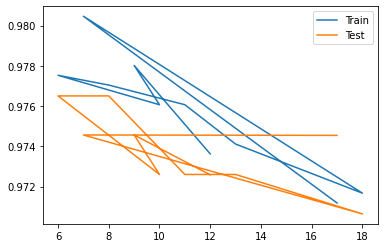

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

##모델평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_best=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_best.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
pred_train=knn_best.predict(X_train) 
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[330   3]
 [  5 174]]


In [ ]:
pred_test=knn_best.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)


테스트데이터 오차행렬:
 [[106   5]
 [  5  55]]


In [ ]:
f1=f1_score(y_test, pred_test)
print("f1 score:", f1,'\n')
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score: 0.9166666666666666 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.92      0.92      0.92        60

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



#랜덤포레스트

###Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 700}
Best Cross-validity Score: 0.973
Test set Score: 0.965


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)
result_grid

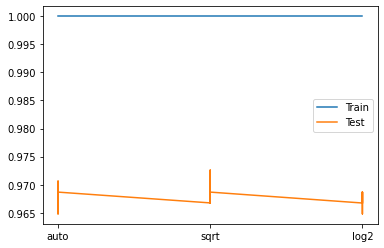

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

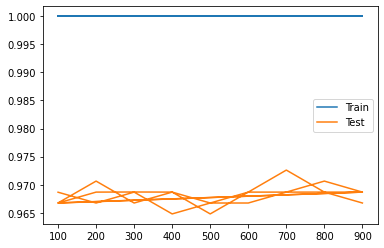

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

###Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4b38bee700>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'auto', 'n_estimators': 295}
Best Cross-validity Score: 0.971
Test set Score: 0.971


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.636404,0.125196,0.050183,0.015328,log2,299,"{'max_features': 'log2', 'n_estimators': 299}",0.990291,0.980583,0.970588,...,0.968685,0.015741,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.709780,0.129302,0.055647,0.016472,auto,316,"{'max_features': 'auto', 'n_estimators': 316}",0.990291,0.970874,0.970588,...,0.968704,0.013047,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.598668,0.147219,0.044129,0.013219,auto,295,"{'max_features': 'auto', 'n_estimators': 295}",0.990291,0.980583,0.970588,...,0.970645,0.013919,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.134895,0.234901,0.081689,0.024001,sqrt,563,"{'max_features': 'sqrt', 'n_estimators': 563}",0.990291,0.980583,0.970588,...,0.968685,0.015741,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,2.655288,1.338362,0.203501,0.098875,sqrt,969,"{'max_features': 'sqrt', 'n_estimators': 969}",0.990291,0.970874,0.970588,...,0.968704,0.013047,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.244164,0.185224,0.159485,0.096220,sqrt,573,"{'max_features': 'sqrt', 'n_estimators': 573}",0.990291,0.980583,0.970588,...,0.968685,0.015741,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.638416,0.510809,0.182238,0.105767,auto,695,"{'max_features': 'auto', 'n_estimators': 695}",0.990291,0.980583,0.980392,...,0.970645,0.016451,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.561520,0.824692,0.094021,0.051435,sqrt,673,"{'max_features': 'sqrt', 'n_estimators': 673}",0.990291,0.980583,0.970588,...,0.968685,0.015741,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.786226,0.007723,0.061635,0.004117,auto,563,"{'max_features': 'auto', 'n_estimators': 563}",0.980583,0.980583,0.970588,...,0.966743,0.013377,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.236113,0.004145,0.018500,0.001182,auto,170,"{'max_features': 'auto', 'n_estimators': 170}",0.990291,0.970874,0.980392,...,0.968704,0.015720,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


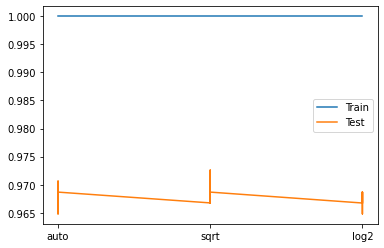

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

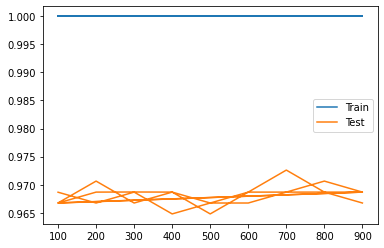

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

###변수중요도

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='sqrt', n_estimators=793)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.04517564 0.22480401 0.26062072 0.02903873 0.08091727 0.22513447
 0.07914054 0.04575653 0.00941209]


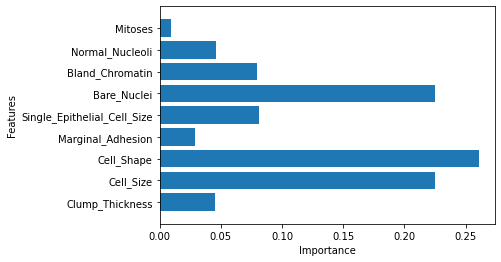

In [ ]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

##모델평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='sqrt', n_estimators=793)
Forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test)
print("f1 score:\n", f1)
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score:
 0.9516129032258064
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



#로지스틱회귀분석

In [ ]:
features = data[[ 'code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
survival = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
print(model.score(train_features, train_labels))
print(model.score(test_features, test_labels))
print(model.coef_)

0.96875
0.9766081871345029
[[-0.03793358  1.27552917  0.23383434  0.86620027  0.83693321  0.23602742
   1.00387462  1.0146153   0.52222665  0.65767611]]


회귀분석/변수 중요도 : 
1. Bland_Chromatin
2. Clump_Thickness
3. Bare_Nuclei